# ASSESMENT CLO-3: TUGAS PKB


Topik Regresi pada Dataset Energy Efficiency menggunakan KNN Regression

Kelompok: ALHAMDULILLAH AKURASI DIATAS 90 :V

Anggota:
- Teuku Ahmad Fattan (1301220319)
- Fikri Fauzi (1301223043)
- Muhammad Faiz (1301223288)

#Pendahuluan


Dataset Energy Efficiency merupakan kumpulan data yang digunakan untuk melakukan analisis energi menggunakan 12 bentuk bangunan yang berbeda yang disimulasikan di Ecotect. Dataset ini terdiri dari 768 contoh dan 8 fitur, dengan tujuan untuk memprediksi dua respons berupa nilai numerik real. Kumpulan data berisi delapan atribut (atau fitur, dilambangkan dengan X1…X8) dan dua response (atau hasil, dilambangkan dengan y1 dan y2).

**Metode yang digunakan**

Metode yang akan digunakan adalah KNN Regression dikarenakan variabel target yang digunakan adalah data continuous (float). KNN Regression lebih cocok digunakan untuk permasalahan ini karena KNN Regression merupakan metode pembuatan model regresi yang menganggap semua atribut adalah atribut yang kontinu, dimana saat pembuatan model, correlation dari satu atribut dengan atribut lainnya tidak dipedulikan.




# EDA

## IMPORT MODULE

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set(color_codes=True)

## LOAD DATA TO DATA FRAME

In [8]:
# Baca dan load dataset
energy_df = pd.read_excel("energy.xlsx")

# Mengubah nama kolom
new_column_names = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

energy_df.rename(columns=new_column_names, inplace=True)

# Menampilkan 5 data teratas
energy_df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## DATA OVERVIEW

In [9]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
energy_df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [11]:
energy_df.shape

(768, 10)

In [12]:
energy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


## VISUALISASI DATA

In [13]:
# energy_df.drop(['X6', 'X8'], axis=1, inplace=True)

In [14]:
# plt.figure(figsize=(15,10))
# for i,col in enumerate(energy_df.iloc[:, :-1],1):
#     plt.subplot(4,3,i)
#     plt.title(f"Distribution of {col} Data")
#     sns.histplot(energy_df[col],kde=True)
#     plt.tight_layout()
#     plt.plot()

In [15]:
# plt.figure(figsize=(15,10))
# sns.pairplot(energy_df,hue="Y1")
# plt.tight_layout()
# plt.plot()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


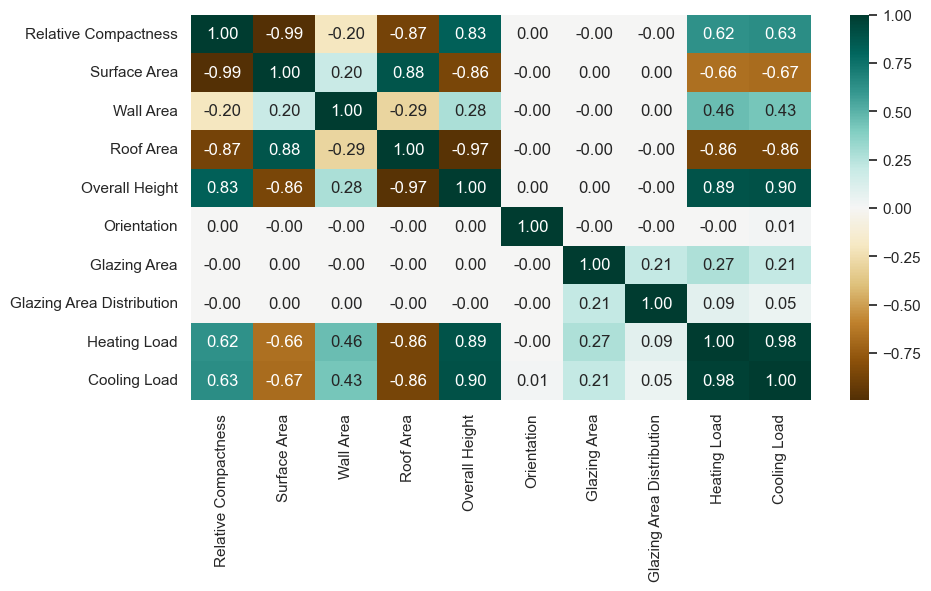

In [16]:
plt.figure(figsize=(10, 5))
c = energy_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True, fmt=".2f")
c


# PREPROCESSING DATA

## CHECKING MISSING DATA

In [17]:
# Check the percentage of missing values in each column
missing_percent = energy_df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 Relative Compactness         0.0
Surface Area                 0.0
Wall Area                    0.0
Roof Area                    0.0
Overall Height               0.0
Orientation                  0.0
Glazing Area                 0.0
Glazing Area Distribution    0.0
Heating Load                 0.0
Cooling Load                 0.0
dtype: float64


In [18]:
energy_df.empty

False

## CHECKING DUPLICATE DATA

In [19]:
duplicate_rows_df = energy_df[energy_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


## IF TARGET IS Y1

### DROP VARIABLE 'Y2' TABLE

In [20]:
energy_df.drop(['Cooling Load'], axis=1, inplace=True)

### DETECTING OUTLIERS

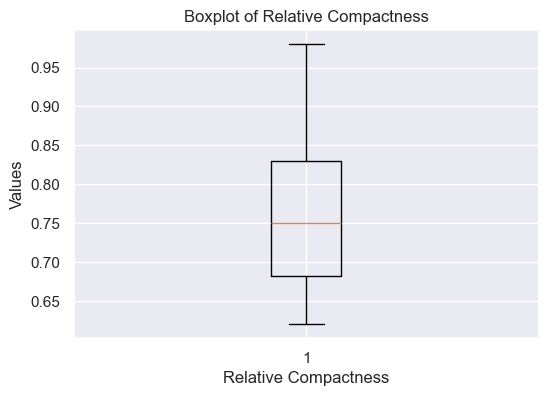

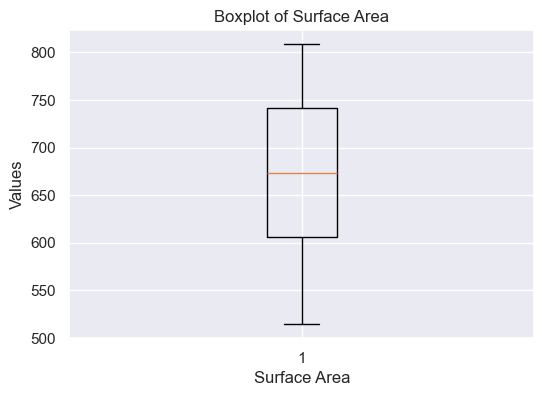

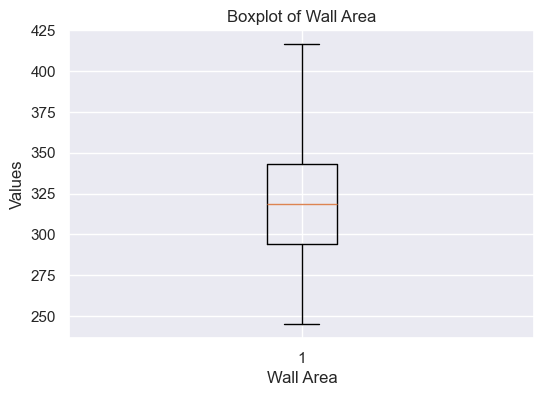

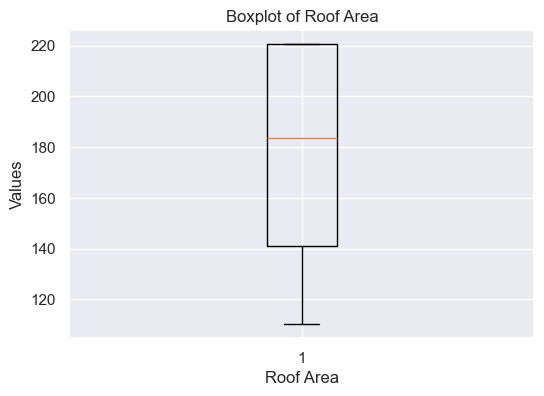

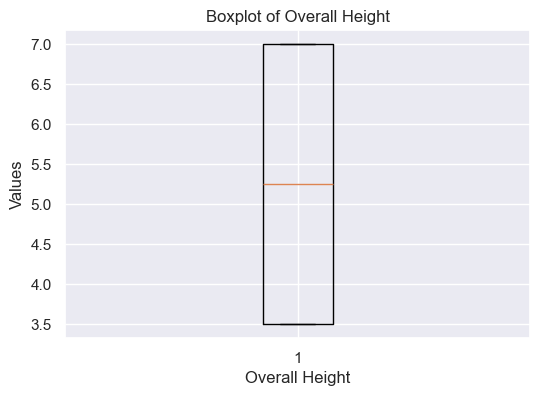

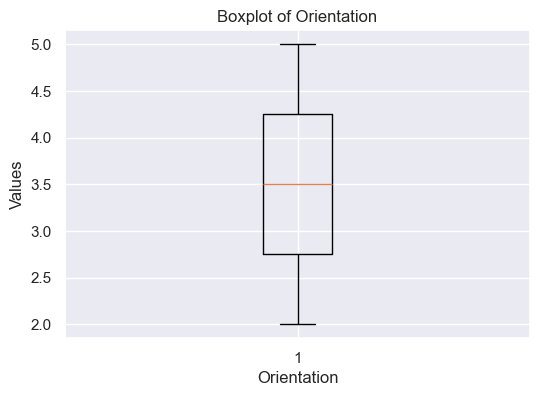

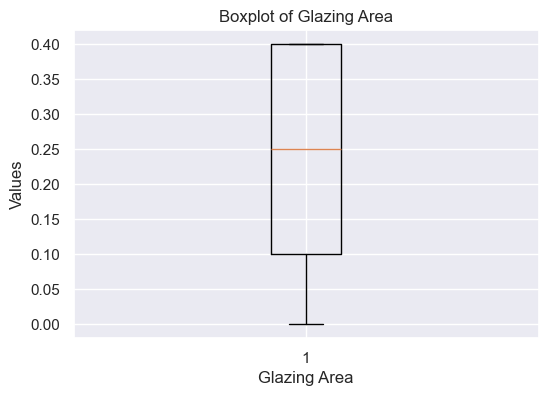

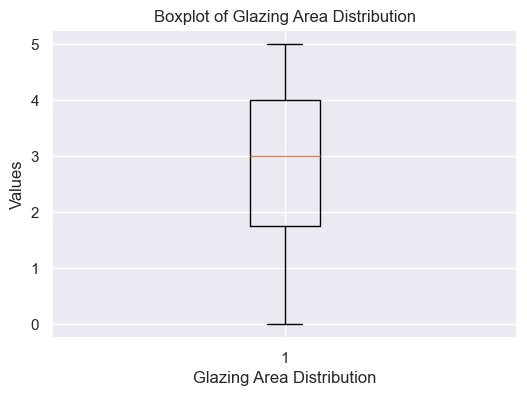

In [21]:
for column in energy_df.columns:
    if column == "Heating Load":
        continue
    plt.figure(figsize=(6, 4))
    plt.boxplot(energy_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

### SPLITTING DATA

In [23]:
# ambil data yang diperlukan
X = energy_df.drop(columns="Heating Load")

# ambil data prediksi
y = energy_df['Heating Load']

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Latih:")
print(X_train)
print(y_train)
print("\nData Uji:")
print(X_test)
print(y_test)

Data Latih:
     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
60                   0.82         612.5      318.5     147.00             7.0   
618                  0.64         784.0      343.0     220.50             3.5   
346                  0.86         588.0      294.0     147.00             7.0   
294                  0.90         563.5      318.5     122.50             7.0   
231                  0.66         759.5      318.5     220.50             3.5   
..                    ...           ...        ...        ...             ...   
71                   0.76         661.5      416.5     122.50             7.0   
106                  0.86         588.0      294.0     147.00             7.0   
270                  0.71         710.5      269.5     220.50             3.5   
435                  0.98         514.5      294.0     110.25             7.0   
102                  0.90         563.5      318.5     122.50             7.0   

     Orientatio

### MODEL DATA

In [27]:
class KNeighborsRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_neighbor_ids = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbor_values = self.y_train[nearest_neighbor_ids]
            predictions.append(np.mean(nearest_neighbor_values))
        return np.array(predictions)

# Membuat dan melatih model
regression = KNeighborsRegressor(n_neighbors=5)
regression.fit(X_train, y_train)

### PREDICT DATA

In [28]:
# Melakukan prediksi
y_pred = regression.predict(X_test)
print(y_pred, "\n", y_test.values)

[14.408 13.628 30.262 40.53  16.946 24.938 26.82  28.5   17.692 31.244
 17.732 34.784 31.356 11.364 17.226 36.028 36.226 12.56  12.824 35.286
 27.192 39.412 12.622 38.692 16.104 38.518 34.228 27.208 16.934 14.968
 12.316 11.63  16.88  25.958 37.07  28.342 30.074 37.6   32.712 12.494
 29.14  11.704 11.75  30.43  10.468 12.136 12.074 11.332 27.984 32.058
 32.676 13.188 13.104 39.118 12.262 15.43  12.86  25.92  38.236 36.546
 12.85  14.206 13.5   24.452 30.112 39.118 37.984 11.746 13.954 12.564
 29.146 29.438 12.112 25.418 29.25  12.268 27.744 25.896 29.192 25.264
 27.77  39.514 11.59  13.714 12.546 12.494 27.35  35.046 37.074 17.748
 15.63  25.72  12.258 12.868 36.298 13.024 27.886 30.166 11.838 11.284
 35.196 29.242 11.19  32.572 29.336 14.926 23.43  14.474 13.384 12.884
 35.036 30.08  25.034 13.888 11.804 12.794 12.38  11.822 12.354 28.594
 32.098 12.566 33.356 15.116 29.972 17.18  13.48  39.262 26.718 37.234
 22.562 35.194 14.784 13.456 13.18  18.234 29.918 39.936 13.082 18.602
 12.59

### REPORT DATA

In [29]:
import numpy as np

# Fungsi untuk menghitung berbagai metrik regresi
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def max_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

def explained_variance_score(y_true, y_pred):
    y_var = np.var(y_true)
    if y_var == 0:
        return 1.0
    return 1 - (np.var(y_true - y_pred) / y_var)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_tot == 0:
        return float('nan') if ss_res != 0 else 1.0
    return 1 - (ss_res / ss_tot)

# Fungsi untuk menampilkan laporan regresi
def regression_report(y_true, y_pred):
    error = y_true - y_pred
    percentil = [5, 25, 50, 75, 95]
    percentil_value = np.percentile(error, percentil)

    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]

    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value:>20.3f}')

    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p:25d}: {pv:>20.3f}')

regression_report(y_test, y_pred)


Metrics for regression:
      mean absolute error:                1.547
    median absolute error:                1.101
       mean squared error:                4.855
                max error:                9.426
                 r2 score:                0.953
 explained variance score:                0.955

Percentiles:
                        5:               -3.852
                       25:               -1.179
                       50:               -0.245
                       75:                0.822
                       95:                2.649


In [30]:

akurasi = r2_score(y_test, y_pred)
print(f"Tingkat Akurasi := {akurasi * 100:.2f}%")


Tingkat Akurasi := 95.34%


## IF TARGET IS Y2

### DROP VARIABLE 'Y1' TABLE

In [31]:
energy_df.drop(['Heating Load'], axis=1, inplace=True)

### DETECTING OUTLIERS

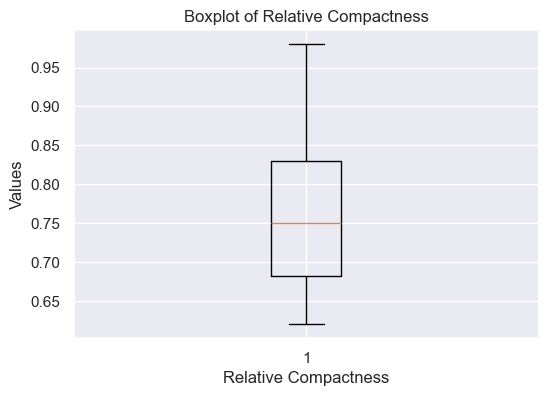

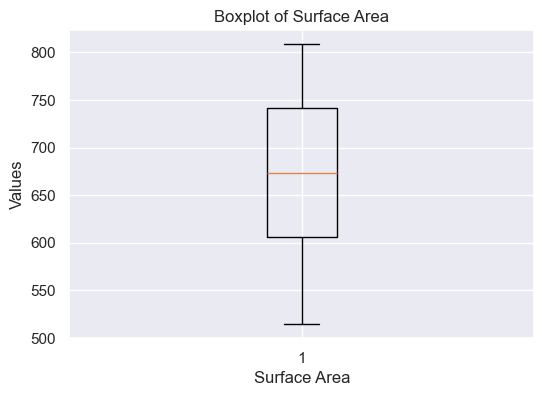

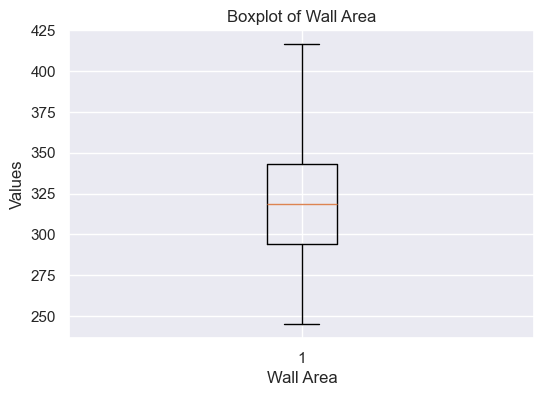

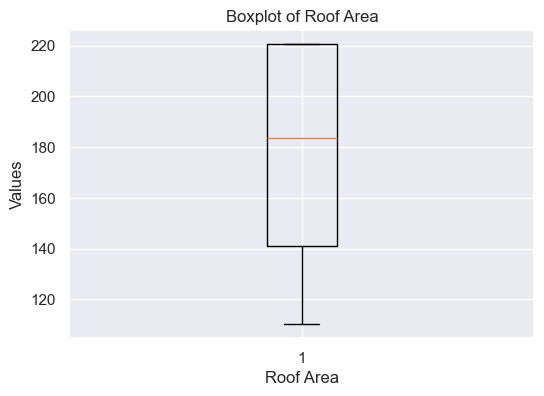

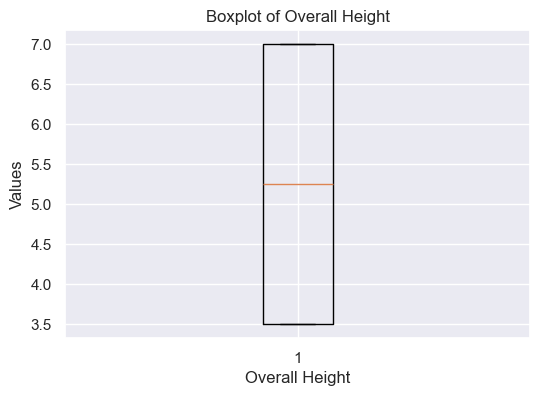

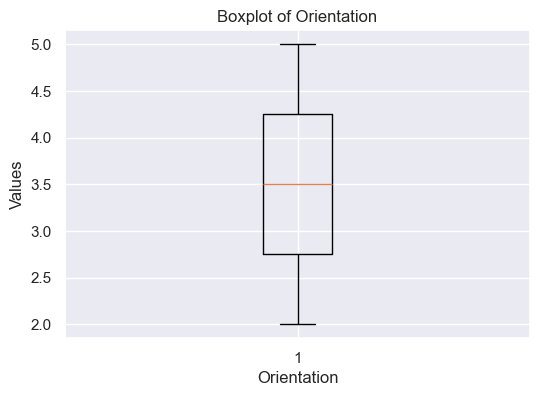

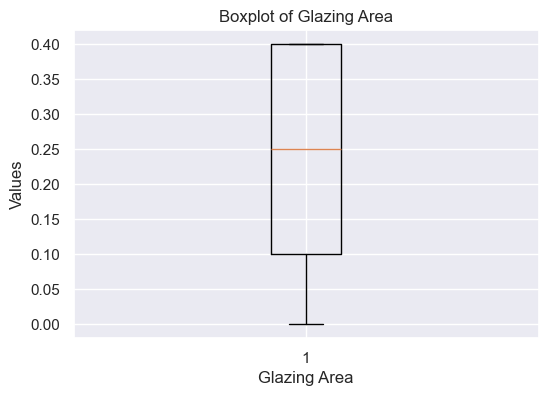

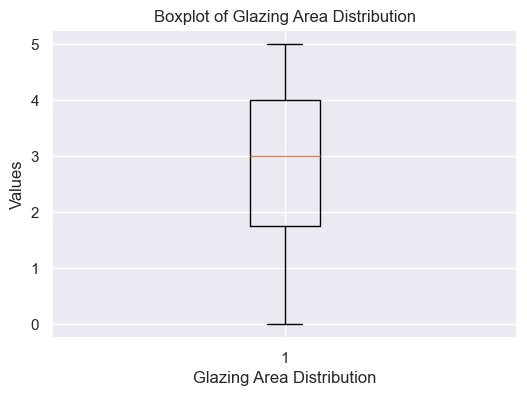

In [32]:
for column in energy_df.columns:
    if column == "Cooling Load":
        continue
    plt.figure(figsize=(6, 4))
    plt.boxplot(energy_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

### SPLITTING DATA

In [33]:
# ambil data yang diperlukan
X = energy_df.drop(columns="Cooling Load")

# ambil data prediksi tipe mine
y = energy_df['Cooling Load']

KeyError: "['Cooling Load'] not found in axis"

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Latih:")
print(X_train)
print(y_train)
print("\nData Uji:")
print(X_test)
print(y_test)

Data Latih:
     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
60                   0.82         612.5      318.5     147.00             7.0   
618                  0.64         784.0      343.0     220.50             3.5   
346                  0.86         588.0      294.0     147.00             7.0   
294                  0.90         563.5      318.5     122.50             7.0   
231                  0.66         759.5      318.5     220.50             3.5   
..                    ...           ...        ...        ...             ...   
71                   0.76         661.5      416.5     122.50             7.0   
106                  0.86         588.0      294.0     147.00             7.0   
270                  0.71         710.5      269.5     220.50             3.5   
435                  0.98         514.5      294.0     110.25             7.0   
102                  0.90         563.5      318.5     122.50             7.0   

     Orientatio

### MODEL DATA

In [ ]:
class KNeighborsRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_neighbor_ids = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbor_values = self.y_train[nearest_neighbor_ids]
            predictions.append(np.mean(nearest_neighbor_values))
        return np.array(predictions)

# Membuat dan melatih model
regression = KNeighborsRegressor(n_neighbors=5)
regression.fit(X_train, y_train)


# regression = KNeighborsRegressor(n_neighbors=5)
# regression.fit(X_train, y_train)

### PREDICT DATA

In [ ]:
# Melakukan prediksi
y_pred = regression.predict(X_test)
print(y_pred, "\n", y_test.values)

[15.384 16.638 30.852 44.57  20.164 27.38  28.184 29.564 21.096 34.912
 21.106 35.798 32.954 14.386 20.182 36.292 36.714 15.322 15.442 35.756
 29.126 42.8   15.38  41.41  19.594 41.026 35.14  28.492 20.598 15.39
 14.912 14.72  20.158 28.008 42.322 29.976 31.378 37.104 34.866 15.43
 30.722 14.428 15.188 30.752 14.08  15.512 15.316 14.918 33.    35.336
 34.372 16.186 16.312 39.456 14.866 19.546 15.462 28.618 38.268 36.522
 15.378 15.312 16.622 27.386 31.59  39.456 42.632 15.078 14.898 14.94
 30.054 30.224 15.024 26.944 33.05  15.158 29.492 28.332 30.47  27.738
 28.662 40.294 14.74  14.83  15.03  15.118 29.59  35.918 36.89  21.218
 19.544 27.508 14.95  15.46  36.796 16.178 31.972 33.86  14.792 14.474
 35.636 30.318 14.448 31.966 29.732 16.008 28.652 15.464 16.234 15.752
 35.948 29.204 27.474 16.788 14.79  15.48  15.502 14.442 15.118 32.364
 34.696 15.43  34.74  15.624 31.452 20.536 16.302 44.806 28.286 37.98
 25.644 36.11  15.486 15.53  16.014 21.33  32.064 41.572 16.026 21.564
 15.65  37

### REPORT DATA

In [ ]:
import numpy as np

# Fungsi untuk menghitung berbagai metrik regresi
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def max_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

def explained_variance_score(y_true, y_pred):
    y_var = np.var(y_true)
    if y_var == 0:
        return 1.0
    return 1 - (np.var(y_true - y_pred) / y_var)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_tot == 0:
        return float('nan') if ss_res != 0 else 1.0
    return 1 - (ss_res / ss_tot)

# Fungsi untuk menampilkan laporan regresi
def regression_report(y_true, y_pred):
    error = y_true - y_pred
    percentil = [5, 25, 50, 75, 95]
    percentil_value = np.percentile(error, percentil)

    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]

    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value:>20.3f}')

    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p:25d}: {pv:>20.3f}')

regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                1.467
    median absolute error:                1.113
       mean squared error:                3.855
                max error:                7.160
                 r2 score:                0.958
 explained variance score:                0.959

Percentiles:
                        5:               -3.862
                       25:               -1.292
                       50:               -0.225
                       75:                0.832
                       95:                2.881


In [ ]:
akurasi = r2_score(y_test, y_pred)
print(f"Tingkat Akurasi := {akurasi * 100:.2f}%")

Tingkat Akurasi := 95.84%


# HASIL DAN PEMBAHASAN

Berdasarkan hasil evaluasi, untuk variabel target Y1 (Heating Load), model KNN Regression memiliki akurasi yang cukup baik dengan nilai r2 sebesar 0,953, yang berarti model memiliki kecocokan data yang baik sekitar 95,34% variasi dalam data. Kemudian, untuk variabel target Y2 (Cooling Load), model KNN Regression juga memiliki akurasi yang baik dengan nilai r2 sebesar 0,958, yang berarti model memiliki kecocokan data yang baik sekitar 95,84% variasi dalam data.


Berdasarkan Heatmap yang kami dapatkan, korelasi yang tinggi antara beberapa fitur dan beban energi mengindikasikan bahwa perubahan dalam fitur-fitur ini akan memiliki dampak signifikan pada beban energi bangunan.

1. Relative Compactness dan Overall Height:
   Kedua fitur ini memiliki korelasi positif yang signifikan dengan Heating Load dan Cooling Load.

2. Surface Area dan Roof Area:
   Kedua fitur ini memiliki korelasi negatif yang signifikan dengan Heating Load dan Cooling Load.

3. Korelasi Tinggi antara Heating Load dan Cooling Load:
   Korelasi yang sangat tinggi (0.98) antara Heating Load dan Cooling Load menunjukkan bahwa faktor-faktor yang mempengaruhi satu jenis beban energi juga mempengaruhi yang lain.




# KESIMPULAN

Metode KNN Regression dipilih karena variabel target merupakan data kontinu (float), dan metode ini tidak memerlukan asumsi korelasi antar variabel prediktor. Data dibagi menjadi data latih (training) dan data uji (testing) dengan rasio 80:20. Untuk variabel target Y1 (Heating Load), model KNN Regression memiliki akurasi yang cukup baik dengan nilai r2 (koefisien determinasi) sebesar **0,953**, yang berarti model dapat menjelaskan sekitar **95,34%** variasi dalam data. Kemudian, untuk variabel target Y2 (Cooling Load), model KNN Regression juga memiliki akurasi yang baik dengan nilai r2 sebesar **0,958**, yang berarti model dapat menjelaskan sekitar **95,84%** variasi dalam data. Secara umum, metode KNN Regression dapat memberikan performa yang cukup baik dalam memprediksi Heating Load dan Cooling Load pada dataset Energy Efficiency ini. Maka dari itu, metode KNN Regression dapat digunakan secara efektif untuk memprediksi beban pemanasan dan pendinginan bangunan berdasarkan fitur-fitur desain bangunan yang tersedia dalam dataset Energy Efficiency.
